In [1]:
pip install yfinance scikit-learn pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn

In [4]:
print(sklearn.__version__)

1.5.2


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import    LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Enter name company ticker: TSLA


[*********************100%***********************]  1 of 1 completed


Mean Squared Error:795.9923529003689


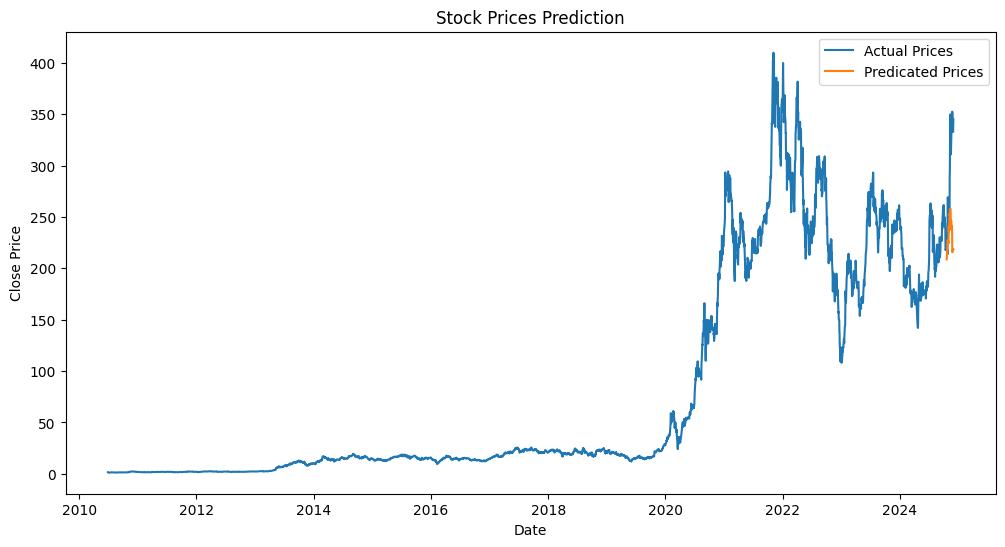

In [6]:
#Fetch historical stock data
def get_stock_data(ticker,start_date,end_date):
    stock_data=yf.download(ticker,start=start_date,end=end_date)
    return stock_data
#prepare data for prediction
def prepare_data(data):
    data['Prediction']=data['Close'].shift(-30)#predicting for next days
    x=np.array(data[['Close']])[:-30]#feature:close price
    y=np.array(data['Prediction'])[:-30]#target:predicated price
    return x,y
def train_model(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    print(f"Mean Squared Error:{mse}")
    return model
#predict and visualize
def predict_and_plot(model,data,X):
    forecast=model.predict(X[-30:])#predicate last 30 days
    future_dates=data.index[-30:]
    plt.figure(figsize=(12,6))
    plt.plot(data.index,data['Close'],label="Actual Prices")
    plt.plot(future_dates,forecast,label="Predicated Prices")
    plt.title("Stock Prices Prediction")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()
if __name__=="__main__":
    ticker=input("Enter name company ticker:")#we can give any company
    start_date="2010-01-01"
    end_date="2024-11-30"
    #fetch and prepare data
    stock_data=get_stock_data(ticker,start_date,end_date)
    X,y=prepare_data(stock_data)
    #train model
    model=train_model(X,y)
    #predict and plot
    predict_and_plot(model,stock_data,X)
    
    